## Lyrics sentiment analysis_전처리 안한 ver1

In [2]:
with open('hoseung2.txt', encoding='utf-8') as f:
    ex1a = f.read()
    print(ex1a)

Love Never Felt So Good Lyrics[Intro: Justin Timberlake]
Dancin'
Let me see you move, come on
Dancin'
Let me see you move

[Verse 1: Michael Jackson]
Baby, love never felt so good
And I doubt if it ever could
Not like you hold me, hold me
Oh baby, love never felt so fine
And I doubt if it's never mine
Not like you hold me, hold me
[Pre-Chorus: Michael Jackson]
And the night is gonna be just fine
Gotta fly, gotta see, can't believe
I can't take it, cause

[Chorus: Michael Jackson]
Baby, every time I love you
In and out of my life, in and out baby
Tell me, if you really love me
It's in and out of my life, in and out baby
So baby, love never felt so good
[Verse 2: Justin Timberlake]
Baby, love never felt so fine
And I doubt if it was ever mine
Not like you hold me, hold me
Ooh baby, love never felt so good
And I doubt if it ever could
Not like you hold me, hold me

[Pre-Chorus: Justin Timberlake & Michael Jackson]
And the night through the thick and thin
Gotta fly, gotta see, can't believ

In [3]:
ex1 = ex1a.split("\n")
ex1

['Love Never Felt So Good Lyrics[Intro: Justin Timberlake]',
 "Dancin'",
 'Let me see you move, come on',
 "Dancin'",
 'Let me see you move',
 '',
 '[Verse 1: Michael Jackson]',
 'Baby, love never felt so good',
 'And I doubt if it ever could',
 'Not like you hold me, hold me',
 'Oh baby, love never felt so fine',
 "And I doubt if it's never mine",
 'Not like you hold me, hold me',
 '[Pre-Chorus: Michael Jackson]',
 'And the night is gonna be just fine',
 "Gotta fly, gotta see, can't believe",
 "I can't take it, cause",
 '',
 '[Chorus: Michael Jackson]',
 'Baby, every time I love you',
 'In and out of my life, in and out baby',
 'Tell me, if you really love me',
 "It's in and out of my life, in and out baby",
 'So baby, love never felt so good',
 '[Verse 2: Justin Timberlake]',
 'Baby, love never felt so fine',
 'And I doubt if it was ever mine',
 'Not like you hold me, hold me',
 'Ooh baby, love never felt so good',
 'And I doubt if it ever could',
 'Not like you hold me, hold me',
 '

In [5]:
import pandas as pd
import numpy as np 

In [6]:
from transformers import pipeline
classifier1 = pipeline('sentiment-analysis')
pd.DataFrame(classifier1(ex1a), index=['Memories'])

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


,label,score
Memories,POSITIVE,0.99572


In [15]:
c1 = pd.DataFrame(classifier1(ex1))
df = pd.DataFrame(ex1,columns=['lyrics']).join(c1)
df

,lyrics,label,score
0,Love Never Felt So Good Lyrics[Intro: Justin T...,POSITIVE,0.989123
1,Dancin',NEGATIVE,0.891808
2,"Let me see you move, come on",POSITIVE,0.999805
3,Dancin',NEGATIVE,0.891808
4,Let me see you move,POSITIVE,0.999835
...,...,...,...
63,"Baby, every time I love you",POSITIVE,0.999331
64,"In and out of my life, in and out baby",POSITIVE,0.995068
65,"Tell me, if you really love me",POSITIVE,0.992198
66,"It's in and out of my life, in and out baby",POSITIVE,0.992973


In [ ]:
# 문장별 분석시 에러 발생...

In [25]:
pd.DataFrame(classifier(ex1a), index=['Memories']) 

Token indices sequence length is longer than the specified maximum sequence length for this model (583 > 512). Running this sequence through the model will result in indexing errors


RuntimeError: The expanded size of the tensor (583) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 583].  Tensor sizes: [1, 514]

In [26]:
# huggingface emotion 
classifier = pipeline("sentiment-analysis", model="michellejieli/emotion_text_classifier")
c2 = pd.DataFrame(classifier(ex1))
df2 = pd.DataFrame(ex1,columns=['lyrics']).join(c2)
df2

,lyrics,label,score
0,Love Never Felt So Good Lyrics[Intro: Justin T...,neutral,0.853168
1,Dancin',neutral,0.962239
2,"Let me see you move, come on",neutral,0.953942
3,Dancin',neutral,0.962239
4,Let me see you move,neutral,0.966785
...,...,...,...
63,"Baby, every time I love you",joy,0.967472
64,"In and out of my life, in and out baby",sadness,0.964509
65,"Tell me, if you really love me",fear,0.314059
66,"It's in and out of my life, in and out baby",sadness,0.987948


In [27]:
a = df['label'].value_counts()
b = df.groupby('label').mean()
pd.DataFrame(a).join(b)

,label,score
POSITIVE,52,0.967166
NEGATIVE,16,0.945127


In [28]:
a = df2['label'].value_counts()
b = df2.groupby('label').mean()
pd.DataFrame(a).join(b)

,label,score
neutral,34,0.943237
sadness,16,0.914139
anger,7,0.733611
joy,4,0.967472
fear,4,0.314059
surprise,3,0.773813


## wordcloud

In [21]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
import nltk
stopwords = nltk.corpus.stopwords.words('english') 
newStopWords = ['verse','bridge','guitar','solo','instrumental','intro',
                'im','get','youre','youve','gotta',"we've","gon'","I'll","can't",
                "yo","yeah",'ayy','ooh','oh','ya','doo','doo doo'] 
stopwords.extend(newStopWords) 

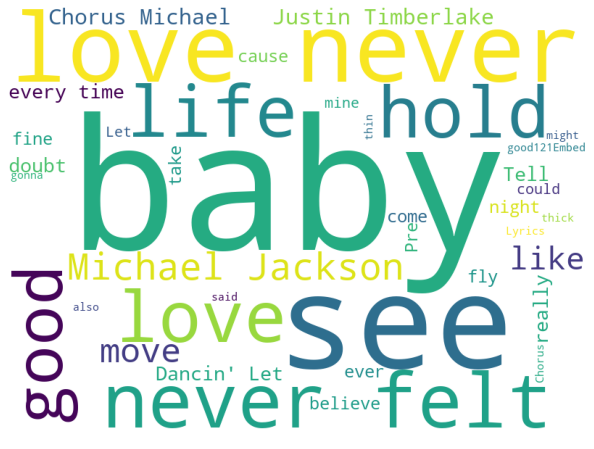

In [23]:
wordcloud = WordCloud(stopwords = stopwords,
                      background_color = 'White', #배경색
                      width = 800,
                      height = 600).generate(' '.join(ex1))

plt.figure(figsize = (12, 8)) # 각각 가로 세로 인치 입니다.
plt.axis("off") # 축에 표시되는 눈금을 제거하는 옵션
plt.imshow(wordcloud) # 이미지가 표시되도록 하는 옵션. 
plt.show() # 최종으로 보여주는 옵션. 